<a href="https://colab.research.google.com/github/arbarvar/Colab_python_test/blob/main/onedypredict_tsetmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://www.youtube.com/watch?v=KYc0EFN-VnM
#Create Your Own Tsetmc Prediction Program Using Python And Machine Learning
#Description: this program predict the price of Google Stock for a specific day

In [24]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

plt.style.use('seaborn-darkgrid')

In [25]:
from google.colab import files
uploaded = files.upload()

Saving Khouz. Steel.csv to Khouz. Steel.csv


In [26]:
#Store and look at the data
#df = pd.read_csv('Mehrcam Pars-a.csv')
df = pd.read_csv('Khouz. Steel.csv')
df

,<TICKER>,<DTYYYYMMDD>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>,<OPENINT>.1,<OPENINT>.2
0,Khouz. Steel,20200101,10350.0,10866.0,10350.0,10809.0,18569273,2.007220e+11,2671,10349.0
1,Khouz. Steel,20200104,10269.0,10354.0,10269.0,10270.0,29996095,3.080639e+11,2073,10809.0
2,Khouz. Steel,20200105,10173.0,10699.0,10173.0,10467.0,4174411,4.369224e+10,1152,10270.0
3,Khouz. Steel,20200107,10417.0,10799.0,9944.0,10090.0,10980314,1.107941e+11,1503,10467.0
4,Khouz. Steel,20200108,9889.0,10198.0,9889.0,9898.0,15358492,1.520240e+11,1219,10090.0
...,...,...,...,...,...,...,...,...,...,...
200,Khouz. Steel,20201110,32300.0,32960.0,31200.0,32070.0,10729265,3.440574e+11,4323,31610.0
201,Khouz. Steel,20201111,32200.0,33670.0,31320.0,33040.0,16873453,5.574328e+11,3904,32070.0
202,Khouz. Steel,20201114,34690.0,34690.0,34420.0,34690.0,5877915,2.039034e+11,833,33040.0
203,Khouz. Steel,20201115,36420.0,36420.0,35040.0,36080.0,29535750,1.065703e+12,6798,34690.0


In [27]:
#in this program we want to predict the price of last day of above date (last one is day 1/31/2017)
#Get and print the last day (for camparing with that one we predict)
actual_price = df.tail(1)
actual_price

,<TICKER>,<DTYYYYMMDD>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>,<OPENINT>.1,<OPENINT>.2
204,Khouz. Steel,20201116,36100.0,37880.0,35500.0,37140.0,16047891,5.959556e+11,5613,36080.0


In [28]:
#prepare the data for training
#removing the last day of data beacuse we want to predict
df=df.head(len(df)-1) # 1 day from last sequence removed
df

,<TICKER>,<DTYYYYMMDD>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>,<OPENINT>.1,<OPENINT>.2
0,Khouz. Steel,20200101,10350.0,10866.0,10350.0,10809.0,18569273,2.007220e+11,2671,10349.0
1,Khouz. Steel,20200104,10269.0,10354.0,10269.0,10270.0,29996095,3.080639e+11,2073,10809.0
2,Khouz. Steel,20200105,10173.0,10699.0,10173.0,10467.0,4174411,4.369224e+10,1152,10270.0
3,Khouz. Steel,20200107,10417.0,10799.0,9944.0,10090.0,10980314,1.107941e+11,1503,10467.0
4,Khouz. Steel,20200108,9889.0,10198.0,9889.0,9898.0,15358492,1.520240e+11,1219,10090.0
...,...,...,...,...,...,...,...,...,...,...
199,Khouz. Steel,20201109,31150.0,33840.0,30910.0,31610.0,28380674,8.971919e+11,5800,32530.0
200,Khouz. Steel,20201110,32300.0,32960.0,31200.0,32070.0,10729265,3.440574e+11,4323,31610.0
201,Khouz. Steel,20201111,32200.0,33670.0,31320.0,33040.0,16873453,5.574328e+11,3904,32070.0
202,Khouz. Steel,20201114,34690.0,34690.0,34420.0,34690.0,5877915,2.039034e+11,833,33040.0


In [29]:
#Create an empty list to store the independet and dependet data
days=list()
close_prices=list()

In [30]:
#Get the date and close price
df_days=df.loc[:,'<DTYYYYMMDD>']
df_close=df.loc[:, '<CLOSE>']
df_days

0      20200101
1      20200104
2      20200105
3      20200107
4      20200108
         ...   
199    20201109
200    20201110
201    20201111
202    20201114
203    20201115
Name: <DTYYYYMMDD>, Length: 204, dtype: int64

In [31]:
#Create the independent data set
for day in df_days:
  days.append( [int(day)-20200000])

#Create the dependent data set
for close_price in df_close:
  close_prices.append(float(close_price))

In [ ]:
#Create the 3 Support Vector Regression Model (SVR model)

In [32]:
#Create and train a SVR Model using a linear kernel
lin_svr = SVR(kernel='linear',C=1000.0)
lin_svr.fit(days,close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
#Create and train a SVR Model using a polinomial kernel
poly_svr = SVR(kernel='poly',C=1000.0, degree=2)
poly_svr.fit(days,close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
#Create and train a SVR Model using a rbf kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma = 0.15 )
rbf_svr.fit(days,close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

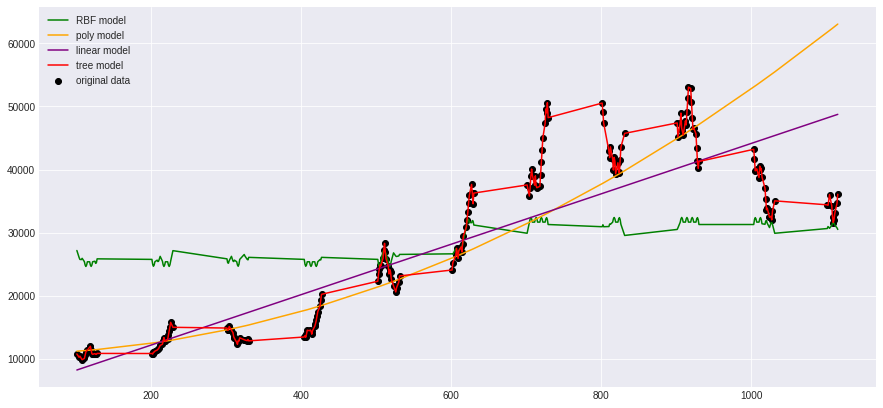

In [36]:
#Plot the models on a graph to see which has the best fit to the orignal data

plt.figure(figsize=(15,7))
plt.scatter(days,close_prices, color='black', label='original data')
plt.plot(days,rbf_svr.predict(days), color='green',label='RBF model' )
plt.plot(days,poly_svr.predict(days), color='orange',label='poly model' )
plt.plot(days,lin_svr.predict(days), color='purple',label='linear model' )
plt.plot(days,tree.predict(days), color='red',label='tree model' )
plt.legend()
plt.show()

In [38]:
#Show the predicted price for given day (for compare we consider the day we remove from secquence  1/31/2017)
day=[[1116],[1117],[1118],[1121]]

print('The RBF SVR predict:',rbf_svr.predict(day))
print('The POLY SVR predict:',poly_svr.predict(day))
print('The LINEAR SVR predict:',lin_svr.predict(day))

#print the actual price
#print('actual price:',actual_price['<CLOSE>'][198]) #last row number

The RBF SVR predict: [29973.13473903 29348.60762187 28886.04712236 28540.53668602]
The POLY SVR predict: [63114.43103371 63208.19559024 63302.04412756 63584.09362429]
The LINEAR SVR predict: [48772.37098326 48812.27775206 48852.18451323 48971.9047891 ]
The Tree predict: [36080. 36080. 36080. 36080.]
